In [1]:
import ipytest
import pytest
import random
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt

ipytest.autoconfig()

## 基本ソートアルゴリズム

In [5]:
%%ipytest

# バブルソート
def bubble_sort(arr):
    for i in range(len(arr)):
        for j in range(i, len(arr)):
            if arr[i] > arr[j]:
                arr[i], arr[j] = arr[j], arr[i]

    return arr


@pytest.mark.parametrize(
    "arr, expected",
    [
        ([3, 2, 1], [1, 2, 3]),
        ([1, 2, 3], [1, 2, 3]),
        ([1], [1]),
        ([], []),
    ],
)

def test_bubble_sort(arr, expected):
    assert bubble_sort(arr) == expected

....                                                                                         [100%]
4 passed in 0.02s


In [3]:
%%time
arr = list(range(10000))[::-1]

# バブルソート(前から順に比較していく）
def bubble_sort(arr):
    for i in range(len(arr)):
        for j in range(i, len(arr)):
            if arr[i] > arr[j]:
                arr[i], arr[j] = arr[j], arr[i]

    return arr

arr_sort = bubble_sort(arr)

CPU times: total: 3.25 s
Wall time: 3.71 s


In [4]:
%%time
arr = list(range(10000))[::-1]

# バブルソート（後ろから順に比較していく）
def bubble_sort(arr):
    for i in range(len(arr)):
        for j in range(len(arr)-1, i, -1):
            if arr[j] < arr[j-1]:
                arr[j], arr[j-1] = arr[j-1], arr[j]

    return arr

arr_sort = bubble_sort(arr)

CPU times: total: 6.72 s
Wall time: 7.79 s


In [8]:
%%ipytest

# コムソート
# バブルソートは隣り合う要素を比較するが、コムソートは間隔をあけて比較する
# そのため，後ろにある小さな要素が前に移動するのが早い
def comb_sort(arr):
    gap = len(arr) # 比較する要素の間隔
    shrink = 1.3 # 縮小率
    swapped = True # 交換が発生したかどうか: 交換が発生しなくなるor間隔が1になるとソート完了

    while gap > 1 or swapped:
        gap = int(gap / shrink) # int()で切り捨て
        if gap < 1:
            gap = 1

        swapped = False
        for i in range(len(arr) - gap):
            if arr[i] > arr[i + gap]:
                arr[i], arr[i + gap] = arr[i + gap], arr[i]
                swapped = True

    return arr

@pytest.mark.parametrize(
    "arr, expected",
    [
        ([3, 2, 1], [1, 2, 3]),
        ([1, 2, 3], [1, 2, 3]),
        ([1], [1]),
        ([], []),
    ],
)

def test_comb_sort(arr, expected):
    assert comb_sort(arr) == expected

....                                                                                         [100%]
4 passed in 0.03s


In [2]:
# コムソート
# バブルソートは隣り合う要素を比較するが、コムソートは間隔をあけて比較する
# そのため，後ろにある小さな要素が前に移動するのが早い
def comb_sort(arr, shrink=1.3):
    gap = len(arr) # 比較する要素の間隔
    swapped = True # 交換が発生したかどうか: 交換が発生しなくなるor間隔が1になるとソート完了

    while gap > 1 or swapped:
        gap = int(gap / shrink) # int()で切り捨て
        if gap < 1:
            gap = 1

        swapped = False
        for i in range(len(arr) - gap):
            if arr[i] > arr[i + gap]:
                arr[i], arr[i + gap] = arr[i + gap], arr[i]
                swapped = True

    return arr

shrinks = [1.1, 1.3, 1.5, 1.8, 2.0, 2.5, 3.0]
times = []
import time

for shrink in shrinks:
    arr = list(range(10000))[::-1]
    start = time.time()
    arr_sort = comb_sort(arr, shrink)
    end = time.time()
    times.append(end - start)

print(shrinks)
print(times)

[1.1, 1.3, 1.5, 1.8, 2.0, 2.5, 3.0]
[0.09875178337097168, 0.019201040267944336, 0.01458430290222168, 0.011384010314941406, 0.01627659797668457, 2.492678165435791, 4.240787029266357]


In [9]:
%%ipytest

# 選択ソート
def selection_sort(arr):
    for i in range(len(arr)):
        min_index = i
        for j in range(i + 1, len(arr)):
            if arr[j] < arr[min_index]:
                min_index = j
        arr[i], arr[min_index] = arr[min_index], arr[i]

    return arr

@pytest.mark.parametrize(
    "arr, expected",
    [
        ([3, 2, 1], [1, 2, 3]),
        ([1, 2, 3], [1, 2, 3]),
        ([1], [1]),
        ([], []),
    ],
)

def test_selection_sort(arr, expected):
    assert selection_sort(arr) == expected

....                                                                                         [100%]
4 passed in 0.04s


In [10]:
%%ipytest

# 挿入ソート
def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and arr[j] > key:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

    return arr

@pytest.mark.parametrize(
    "arr, expected",
    [
        ([3, 2, 1], [1, 2, 3]),
        ([1, 2, 3], [1, 2, 3]),
        ([1], [1]),
        ([], []),
    ],
)

def test_insertion_sort(arr, expected):
    assert insertion_sort(arr) == expected

....                                                                                         [100%]
4 passed in 0.05s


In [15]:
%%ipytest

def bubble_sort_kry(arr, key=lambda x: x):
    arr_key = [key(x) for x in arr]
    for i in range(len(arr)):
        for j in range(i, len(arr)):
            if arr_key[i] > arr_key[j]:
                arr[i], arr[j] = arr[j], arr[i]
                arr_key[i], arr_key[j] = arr_key[j], arr_key[i]

    return arr

@pytest.mark.parametrize(
    "arr, key, expected",
    [
        ([3, 2, 1], lambda x: x, [1, 2, 3]),
        ([1, 2, 3], lambda x: x, [1, 2, 3]),
        ([1], lambda x: x, [1]),
        ([], lambda x: x, []),
        ([3, 2, 1], lambda x: -x, [3, 2, 1]),
        ([1, 2, 3], lambda x: -x, [3, 2, 1]),
        ([1], lambda x: -x, [1]),
        ([], lambda x: -x, []),
    ],
)

def test_bubble_sort_kry(arr, key, expected):
    assert bubble_sort_kry(arr, key) == expected

........                                                                                     [100%]
8 passed in 0.04s


In [3]:
arr = [3, 2, 1]
sorted(arr)

[1, 2, 3]

In [4]:
arr

[3, 2, 1]

In [5]:
arr.sort()

In [6]:
arr

[1, 2, 3]

## 発展ソートアルゴリズム

In [22]:
%%ipytest

# Tim Sort
# https://qiita.com/nishiwakki/items/806c24b8d061083d0808
# マージソートと挿入ソートを組み合わせたアルゴリズム
# Pythonのsorted()関数やlist.sort()関数で使われている
def tim_sort(arr):
    if len(arr) < 2:
        return arr

    def _calc_minrun(n):
        r = 0
        while n >= 64:
            r |= n & 1 # nの最下位ビットをrの最下位ビットにコピー
            n >>= 1 # nを1ビット右シフト: nを2で割る
        return n + r

    def _insertion_sort(arr, left, right):
        for i in range(left + 1, right + 1):
            key = arr[i]
            j = i - 1
            while j >= left and arr[j] > key:
                arr[j + 1] = arr[j]
                j -= 1
            arr[j + 1] = key

    def _merge(arr, l, m, r):
        len1, len2 = m - l + 1, r - m
        left, right = [], []
        for i in range(len1):
            left.append(arr[l + i])
        for i in range(len2):
            right.append(arr[m + 1 + i])

        i, j, k = 0, 0, l
        while i < len1 and j < len2:
            if left[i] <= right[j]:
                arr[k] = left[i]
                i += 1
            else:
                arr[k] = right[j]
                j += 1
            k += 1

        while i < len1:
            arr[k] = left[i]
            i += 1
            k += 1

        while j < len2:
            arr[k] = right[j]
            j += 1
            k += 1
    minrun = _calc_minrun(len(arr)) # 最小の部分配列の要素数
    
    # 1:サブ配列に分割
    for i in range(0, len(arr), minrun):
        _insertion_sort(arr, i, min((i + minrun - 1), len(arr) - 1)) # 2: サブ配列内で挿入ソート
    
    # 3: サブ配列をマージ
    size = minrun
    while size < len(arr):
        for left in range(0, len(arr), 2 * size):
            mid = left + size - 1
            right = min((left + 2 * size - 1), len(arr) - 1)
            _merge(arr, left, mid, right)
        size *= 2

    return arr

a = list(range(1000))
random.shuffle(a)
@pytest.mark.parametrize(
    "arr, expected",
    [
        (a, list(range(1000))),
    ],
)

def test_tim_sort(arr, expected):
    assert tim_sort(arr) == expected

.                                                                                            [100%]
1 passed in 0.02s


In [23]:
%%ipytest

# シェルソート
def shell_sort(arr):
    n = len(arr)
    gap = n // 2

    while gap > 0:
        for i in range(gap, n):
            temp = arr[i]
            j = i
            while j >= gap and arr[j - gap] > temp:
                arr[j] = arr[j - gap]
                j -= gap
            arr[j] = temp
        gap //= 2

    return arr

@pytest.mark.parametrize(
    "arr, expected",
    [
        ([3, 2, 1], [1, 2, 3]),
        ([1, 2, 3], [1, 2, 3]),
        ([1], [1]),
        ([], []),
    ],
)

def test_shell_sort(arr, expected):
    assert shell_sort(arr) == expected

....                                                                                         [100%]
4 passed in 0.04s


In [7]:
def shell_sort(arr, gap_sp=2):
    n = len(arr)
    gap = n // gap_sp

    while gap > 0:
        for i in range(gap, n):
            temp = arr[i]
            j = i
            while j >= gap and arr[j - gap] > temp:
                arr[j] = arr[j - gap]
                j -= gap
            arr[j] = temp
        gap //= gap_sp

    return arr

gaps = [2, 3, 4, 5, 6, 7, 8, 9, 10]
times = []
import time

for gap in gaps:
    arr = list(range(10000))[::-1]
    start = time.time()
    arr_sort = shell_sort(arr, gap)
    end = time.time()
    times.append(end - start)

print(gaps)
print(times)

[2, 3, 4, 5, 6, 7, 8, 9, 10]
[0.03300333023071289, 0.03737950325012207, 0.02127981185913086, 0.014247894287109375, 0.01624894142150879, 0.01432347297668457, 0.019155025482177734, 0.01949453353881836, 0.02159285545349121]


In [5]:
%%ipytest

# ヒープソート
def heap_sort(arr):
    def _align_element(arr, start, end):
        """ヒープを構築

        Args:
            arr (_type_): 整列対象の配列
            start (_type_): 整列対象の開始インデックス
            end (_type_): 整列対象の終了インデックス
        """
        k = start
        
        while True:
            left = arr[2*k + 1] if 2*k + 1 < end else -np.inf
            right = arr[2*k + 2] if 2*k + 2 < end else -np.inf

            if left == -np.inf and right == -np.inf:
                break
            elif arr[k] >= max(left, right):
                break
            elif left > right:
                arr[k], arr[2*k + 1] = arr[2*k + 1], arr[k]
                k = 2*k + 1
            else:
                arr[k], arr[2*k + 2] = arr[2*k + 2], arr[k]
                k = 2*k + 2

    def _build_heap(arr):
        """ヒープを構築

        Args:
            arr (_type_): ヒープを構築する配列
        """
        for i in range(len(arr)//2, -1, -1):
            _align_element(arr, i, len(arr))

    def _delete_root(arr, end):
        """根を削除

        Args:
            arr (_type_): 根を削除する配列
            end (_type_): 現在の配列の終了インデックス
        """
        arr[0], arr[end] = arr[end], arr[0]
        _align_element(arr, 0, end)

    _build_heap(arr)
    for i in range(len(arr)-1, 0, -1):
        _delete_root(arr, i)

    return arr

@pytest.mark.parametrize(
    "arr, expected",
    [
        ([3, 2, 1], [1, 2, 3]),
        ([1, 2, 3], [1, 2, 3]),
        ([1], [1]),
        ([], []),
    ],
)

def test_heap_sort(arr, expected):
    assert heap_sort(arr) == expected


....                                                                                         [100%]
4 passed in 0.04s


In [7]:
%%ipytest

# マージソート
def merge_sort(arr):
    if len(arr) <= 1:
        return arr

    def _merge(left, right):
        result = []
        i = j = 0
        while i < len(left) and j < len(right):
            if left[i] <= right[j]:
                result.append(left[i])
                i += 1
            else:
                result.append(right[j])
                j += 1

        result += left[i:]
        result += right[j:]

        return result

    mid = len(arr) // 2
    left = merge_sort(arr[:mid])
    right = merge_sort(arr[mid:])

    return _merge(left, right)

@pytest.mark.parametrize(
    "arr, expected",
    [
        ([10, 9, 8, 7, 6, 5, 4, 3, 2, 1], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]),
        ([1, 2, 3], [1, 2, 3]),
        ([1], [1]),
        ([], []),
    ],
)

def test_merge_sort(arr, expected):
    assert merge_sort(arr) == expected


....                                                                                         [100%]
4 passed in 0.02s


In [2]:
%%ipytest

# クイックソート
def quick_sort(arr):
    if len(arr) <= 1:
        return arr

    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]

    return quick_sort(left) + middle + quick_sort(right)

@pytest.mark.parametrize(
    "arr, expected",
    [
        ([10, 9, 8, 7, 6, 5, 4, 3, 2, 1], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]),
        ([1, 2, 3], [1, 2, 3]),
        ([1], [1]),
        ([], []),
    ],
)

def test_quick_sort(arr, expected):
    assert quick_sort(arr) == expected

....                                                                                         [100%]
4 passed in 0.03s


## 探索アルゴリズム

In [3]:
%%ipytest

# 線形探索
def linear_search(arr, target):
    for i, x in enumerate(arr):
        if x == target:
            return i

    return -1

@pytest.mark.parametrize(
    "arr, target, expected",
    [
        ([1, 2, 3], 2, 1),
        ([1, 2, 3], 4, -1),
        ([1], 1, 0),
        ([], 1, -1),
    ],
)

def test_linear_search(arr, target, expected):
    assert linear_search(arr, target) == expected

....                                                                                         [100%]
4 passed in 0.03s


In [2]:
%%ipytest

# 二分探索
def binary_search(arr, target):
    left, right = 0, len(arr) - 1
    while left <= right:
        mid = (left + right) // 2
        if arr[mid] == target:
            return mid
        elif arr[mid] < target:
            left = mid + 1
        else:
            right = mid - 1

    return -1

@pytest.mark.parametrize(
    "arr, target, expected",
    [
        ([1, 2, 3], 2, 1),
        ([1, 2, 3], 4, -1),
        ([1], 1, 0),
        ([], 1, -1),
    ],
)

def test_binary_search(arr, target, expected):
    assert binary_search(arr, target) == expected

....                                                                                         [100%]
4 passed in 0.07s


In [6]:
arr = [0, 2, 4, 1, 3]
sort_idx = sorted(range(len(arr)), key=lambda x: arr[x])
sort_arr = sorted(arr)

idx = binary_search(sort_arr, 2)
print(idx)
print(sort_idx[idx])

2
1


In [7]:
%%ipytest

# 二分探索木
class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

class BinarySearchTree:
    def __init__(self):
        self.root = None

    def insert(self, value):
        if self.root is None:
            self.root = Node(value)
        else:
            self._insert(self.root, value)

    def _insert(self, node, value):
        if value < node.value:
            if node.left is None:
                node.left = Node(value)
            else:
                self._insert(node.left, value)
        else:
            if node.right is None:
                node.right = Node(value)
            else:
                self._insert(node.right, value)

    def search(self, value):
        return self._search(self.root, value)

    def _search(self, node, value):
        if node is None:
            return False
        elif node.value == value:
            return True
        elif value < node.value:
            return self._search(node.left, value)
        else:
            return self._search(node.right, value)

    def delete(self, value):
        self.root = self._delete(self.root, value)

    def _delete(self, node, value):
        if node is None:
            return None
        if value < node.value:
            node.left = self._delete(node.left, value)
        elif value > node.value:
            node.right = self._delete(node.right, value)
        else:
            if node.left is None:
                return node.right
            elif node.right is None:
                return node.left
            else:
                node.value = self._find_min(node.right).value
                node.right = self._delete(node.right, node.value)

        return node

    def _find_min(self, node):
        while node.left is not None:
            node = node.left
        return node

    def inorder(self):
        return self._inorder(self.root)

    def _inorder(self, node):
        if node is not None:
            self._inorder(node.left)
            print(node.value)
            self._inorder(node.right)

bst = BinarySearchTree()
bst.insert(3)
bst.insert(1)
bst.insert(4)
bst.insert(2)
bst.insert(5)
bst.inorder()

print()

bst.delete(3)
bst.inorder()

@pytest.mark.parametrize(
    "arr, target, expected",
    [
        ([1, 2, 3], 2, True),
        ([1, 2, 3], 4, False),
        ([1], 1, True),
        ([], 1, False),
    ],
)

def test_binary_search_tree(arr, target, expected):
    bst = BinarySearchTree()
    for x in arr:
        bst.insert(x)
    assert bst.search(target) == expected

1
2
3
4
5

1
2
4
5
....                                                                                         [100%]
4 passed in 0.05s


In [15]:
import sys
from tqdm import tqdm

sys.setrecursionlimit(10**6)

bst = BinarySearchTree()
for i in tqdm(range(100000)):
    bst.insert(i)

 51%|█████     | 50541/100000 [03:55<03:50, 214.61it/s]


## 画像に関するアルゴリズム

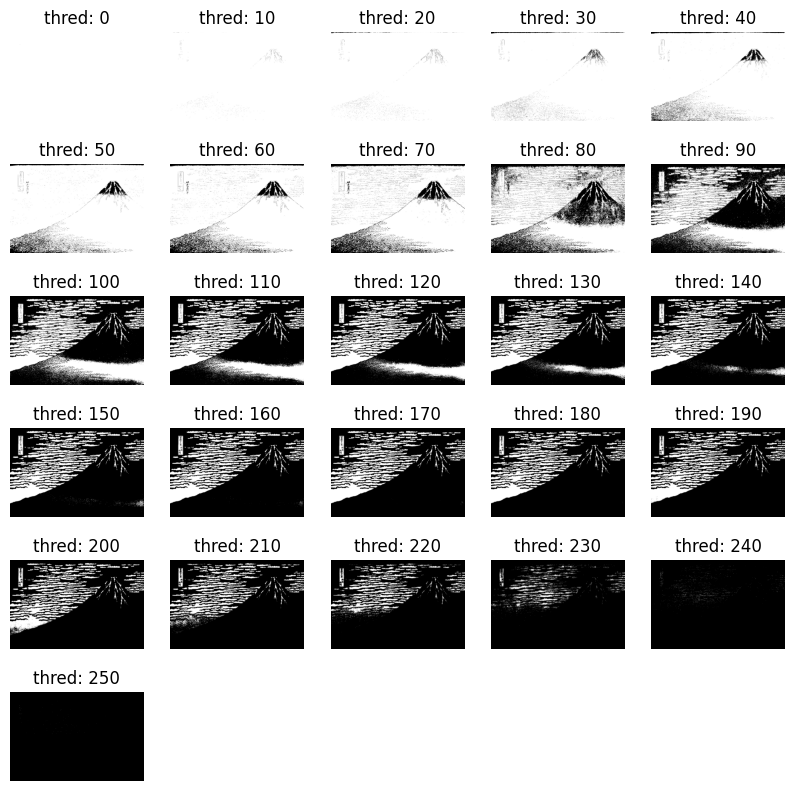

In [21]:
# 画像の二値化
WHITE = 255
BLACK = 0

def binarization(img, threshold=128):
    w, h = img.size
    img_bin = Image.new("L", (w, h))

    for x in range(w):
        for y in range(h):
            r, g, b = img.getpixel((x, y))
            p = r * 0.299 + g * 0.587 + b * 0.114
            img_bin.putpixel((x, y), WHITE if p > threshold else BLACK)

    # rgb化
    img_bin_rgb = img_bin.convert("RGB")

    return img_bin, img_bin_rgb

img = Image.open("fuji.jpg")
img = img.convert("RGB")
threds = list(range(0, 256, 10))
save_folder = "./img_bins/"

for thred in threds:
    img_bin, img_bin_rgb = binarization(img, thred)
    img_bin.save(os.path.join(save_folder, f"fuji_bin_{thred}.png"))
    img_bin_rgb.save(os.path.join(save_folder, f"fuji_bin_rgb_{thred}.png"))

# 1枚にまとめてmtploplibで表示
fig = plt.figure(figsize=(10, 10))
num_imgs = len(threds)
col = 5
row = num_imgs // col + 1

for i, thred in enumerate(threds):
    img_bin = Image.open(os.path.join(save_folder, f"fuji_bin_rgb_{thred}.png"))
    ax = fig.add_subplot(row, col, i + 1)
    ax.imshow(img_bin)
    ax.axis("off")
    ax.set_title(f"thred: {thred}")

plt.show()

In [22]:
# グレイスケール化
img = Image.open("fuji.jpg")
img = img.convert("RGB")

w, h = img.size
gray_img = Image.new("L", (w, h))

for x in range(w):
    for y in range(h):
        r, g, b = img.getpixel((x, y))
        p = r * 0.299 + g * 0.587 + b * 0.114
        gray_img.putpixel((x, y), int(p))

gray_img.save("fuji_gray.jpg")

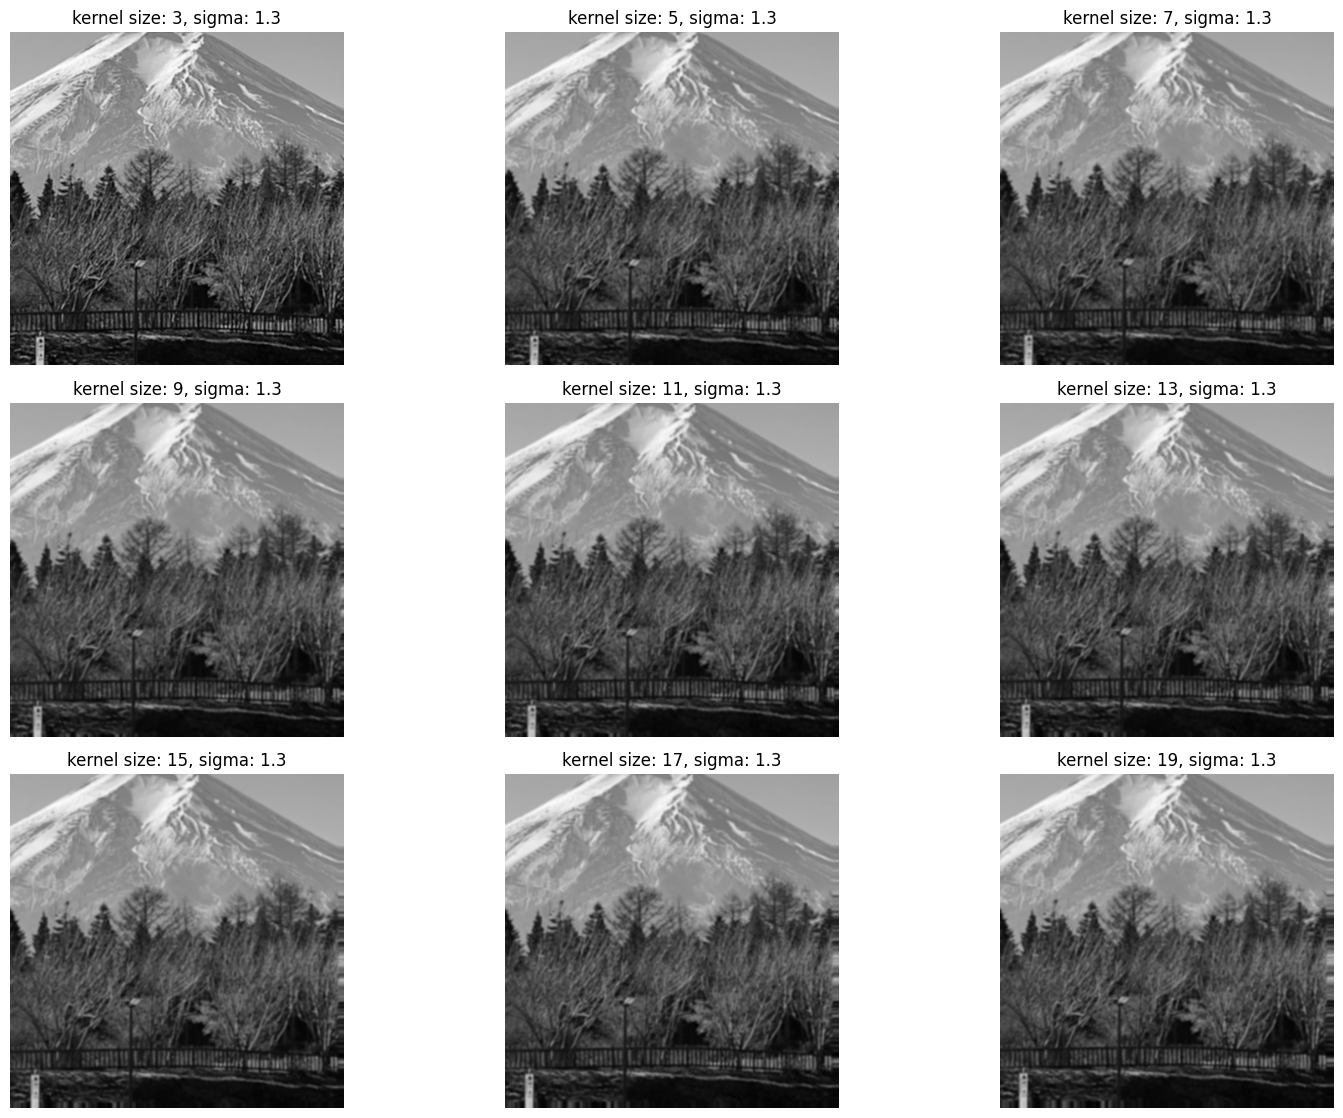

In [36]:
# ガウシアンフィルタ
def gaussian_filter(img, kernel_size=3, sigma=1.3):
    w, h = img.size
    img_res = Image.new("L", (w, h))

    kernel = np.zeros((kernel_size, kernel_size))
    for x in range(kernel_size):
        for y in range(kernel_size):
            kernel[x, y] = np.exp(-((x - kernel_size // 2) ** 2 + (y - kernel_size // 2) ** 2) / (2 * sigma ** 2))

    kernel /= kernel.sum()  # カーネルの総和が1になるように正規化

    for x in range(w):
        for y in range(h):
            p = 0
            for i in range(kernel_size):
                for j in range(kernel_size):
                    yy = max(0, min(y + i - 1, h - 1))
                    xx = max(0, min(x + j - 1, w - 1))
                    v = img.getpixel((xx, yy))
                    p += v * kernel[i, j]

            img_res.putpixel((x, y), int(p))

    # rgb化
    img_res_rgb = img_res.convert("RGB")

    return img_res, img_res_rgb

img = Image.open("fuji2.jpg")
x, y, w, h = 380, 200, 400, 400
img = img.crop((x, y, x + w, y + h))
gray_img = img.convert("L")
gf_img = gaussian_filter(gray_img, kernel_size=3, sigma=1.3)

ksizes = list(range(3, 21, 2))
save_path = "./img_gfs_ksize/"
# for ksize in ksizes:
#     gf_img, gf_img_rgb = gaussian_filter(gray_img, kernel_size=ksize, sigma=1.3)
#     gf_img.save(os.path.join(save_path, f"fuji_gf_{ksize}.png"))
#     gf_img_rgb.save(os.path.join(save_path, f"fuji_gf_rgb_{ksize}.png"))

# 1枚にまとめる
fig = plt.figure(figsize=(15, 15))
num_imgs = len(ksizes)
col = 3
row = num_imgs // col + 1

for i, ksize in enumerate(ksizes):
    img_gf = Image.open(os.path.join(save_path, f"fuji_gf_rgb_{ksize}.png"))
    ax = fig.add_subplot(row, col, i + 1)
    ax.imshow(img_gf)
    ax.axis("off")
    ax.set_title(f"kernel size: {ksize}, sigma: 1.3")

plt.tight_layout()

plt.savefig("gaussian_filter_ksize.png")
plt.show()

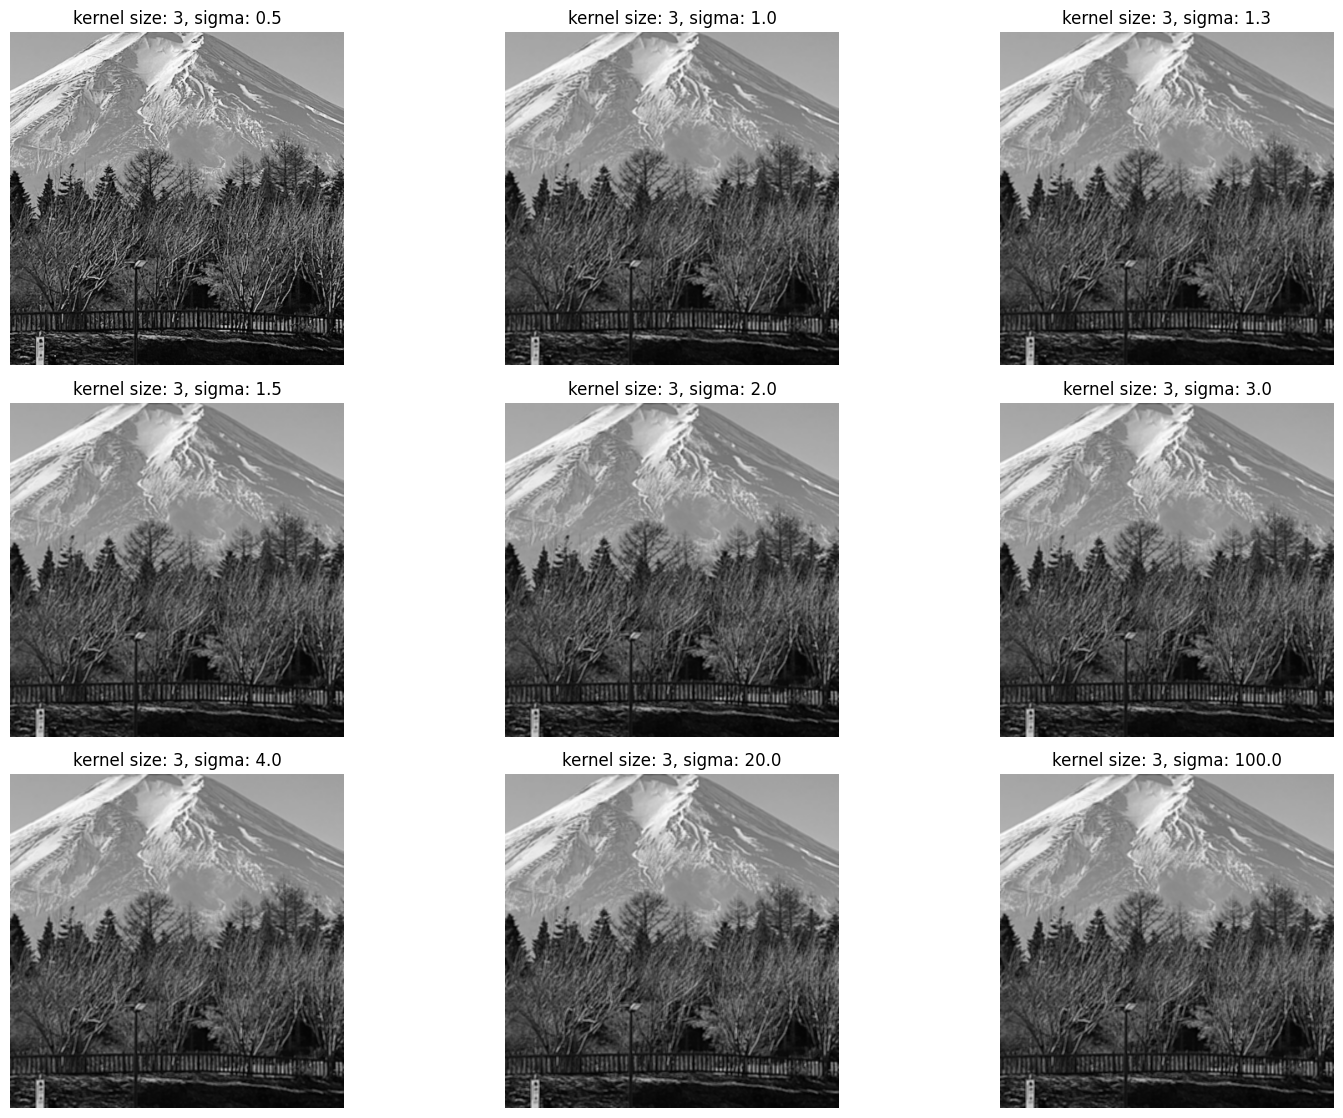

In [39]:
sigmas = [0.5, 1.0, 1.3, 1.5, 2.0, 3.0, 4.0, 20.0, 100.0]

save_path = "./img_gfs_sigma/"

for sigma in sigmas:
    gf_img, gf_img_rgb = gaussian_filter(gray_img, kernel_size=3, sigma=sigma)
    gf_img.save(os.path.join(save_path, f"fuji_gf_{sigma}.png"))
    gf_img_rgb.save(os.path.join(save_path, f"fuji_gf_rgb_{sigma}.png"))

# 1枚にまとめる
fig = plt.figure(figsize=(15, 15))
num_imgs = len(sigmas)
col = 3
row = num_imgs // col + 1

for i, sigma in enumerate(sigmas):
    img_gf = Image.open(os.path.join(save_path, f"fuji_gf_rgb_{sigma}.png"))
    ax = fig.add_subplot(row, col, i + 1)
    ax.imshow(img_gf)
    ax.axis("off")
    ax.set_title(f"kernel size: 3, sigma: {sigma}")

plt.tight_layout()

plt.savefig("gaussian_filter_sigma.png")
plt.show()

In [33]:
# 画像のリサイズ処理

def resize(img, size):
    sw, sh = img.size
    dw, dh = size
    scale_x = dw / sw
    scale_y = dh / sh
    print(f"size: ({sw}, {sh}) -> ({dw}, {dh}), scale: ({scale_x}, {scale_y})")

    img_res = Image.new("RGB", size)
    for dx in range(dw):
        for dy in range(dh):
            sx, sy = int(dx / scale_x), int(dy / scale_y)
            r, g, b = img.getpixel((sx, sy))
            img_res.putpixel((dx, dy), (r, g, b))

    return img_res

img = Image.open("soba.jpg")
img = img.convert("RGB")
x, y, w, h = 130, 50, 740, 740
img = img.crop((x, y, x + 150, y + 150))
img_res = resize(img, (w, h))
img_res.save("soba_resized.jpg")

size: (150, 150) -> (740, 740), scale: (4.933333333333334, 4.933333333333334)


In [35]:
# 線形補完法でリサイズ
def resize_linear(img, size):
    sw, sh = img.size
    dw, dh = size
    scale_x = dw / sw
    scale_y = dh / sh
    print(f"size: ({sw}, {sh}) -> ({dw}, {dh}), scale: ({scale_x}, {scale_y})")

    img_res = Image.new("RGB", size)
    for dx in range(dw):
        for dy in range(dh):
            sx, sy = dx / scale_x, dy / scale_y
            sx0, sy0 = int(sx), int(sy)
            sx1, sy1 = min(sx0 + 1, sw - 1), min(sy0 + 1, sh - 1)

            p00 = img.getpixel((sx0, sy0))
            p01 = img.getpixel((sx0, sy1))
            p10 = img.getpixel((sx1, sy0))
            p11 = img.getpixel((sx1, sy1))

            wx = sx - sx0
            wy = sy - sy0

            rgb = [0, 0, 0]

            for i in range(3):
                rgb[i] = int((1 - wx) * (1 - wy) * p00[i] + wx * (1 - wy) * p10[i] + (1 - wx) * wy * p01[i] + wx * wy * p11[i])

            img_res.putpixel((dx, dy), tuple(rgb))

    return img_res

img = Image.open("soba.jpg")
img = img.convert("RGB")
x, y, w, h = 130, 50, 740, 740
img = img.crop((x, y, x + 150, y + 150))
img_res = resize_linear(img, (w, h))

img_res.save("soba_resized_linear.jpg")

size: (150, 150) -> (740, 740), scale: (4.933333333333334, 4.933333333333334)
